In [21]:
from pathlib import Path

GRAPH_PATH = Path() / "graphviz" / "decision_trees"
GRAPH_PATH.mkdir(parents=True, exist_ok=True)

# Training and Visualizing a Decision Tree

In [22]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [23]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [25]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(GRAPH_PATH / "iris_tree.dot"),
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

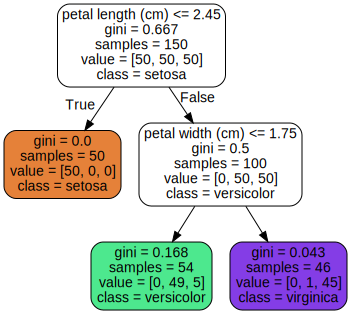

In [26]:
from graphviz import Source

Source.from_file(GRAPH_PATH / "iris_tree.dot")

In [27]:
# Convert .dot to .png
!dot -Tpng {GRAPH_PATH / "iris_tree.dot"} -o {GRAPH_PATH / "iris_tree.png"}

In [28]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [29]:
tree_clf.predict([[5, 1.5]])

array([1])

*Aby uniknąć przetrenowania modelu, musimy ograniczyć swobodę algorytmu drzewa decyzyjnego
podczas uczenia. Proces nosi nazwę regularyzacji. Hiperparametry regularyzacyjne
zależą od stosowanego algorytmu, zazwyczaj jednak możemy ograniczyć przynajmniej maksymalną wysokość drzewa. W module Scikit-Learn odpowiada za to hiperparametr `max_depth`. Jego wartość domyślna, None, powoduje tworzenie drzew o nieograniczonej wysokości. Podanie wartości liczbowej
w hiperparametrze `max_depth` spowoduje regularyzację modelu i zmniejszenie ryzyka przetrenowania.*

Klasa `DecisionTreeClassifier` zawiera także kilka innych parametrów ograniczających kształt drzewa decyzyjnego:
* **max_features** - Maksymalna liczba cech używanych do dzielenia w każdym węźle.
* **max_leaf_nodes** - Maksymalna liczba liści.
* **min_samples_split** - Minimalna liczba próbek, jakie muszą się znajdować w węźle, aby został podzielony.
* **min_samples_leaf** - Minimalna liczba próbek, jakie muszą się znajdować w liściu.
* **min_weight_fraction_leaf** - Taki sam jak parametr min_samples_leaf, tu jednak wartością jest ułamek całkowitej liczby ważonych
próbek.

Zwiększanie wartości hiperparametrów min_* lub zmniejszanie max_* powoduje regularyzację modelu.

In [30]:
# help(tree_clf.tree_)

### Regularization Hyperparameters Example

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [32]:
X[:3], y[:3]

(array([[-1.16436758e+00,  1.42987472e-04],
        [ 9.90781738e-01,  4.56012477e-01],
        [ 8.10245961e-01,  4.69638179e-01]]),
 array([0, 0, 0]))

In [33]:
y_pred = tree_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test: {acc:.2f}")

Accuracy on test: 0.80


In [34]:
def plot_decision_boundary(model, X, y, title=""):
  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                       np.linspace(y_min, y_max, 300))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.title(title)
  plt.show()

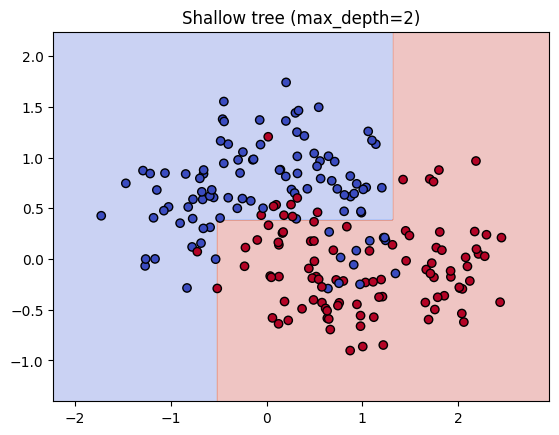

In [35]:
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X, y)
plot_decision_boundary(shallow_tree, X, y, "Shallow tree (max_depth=2)")

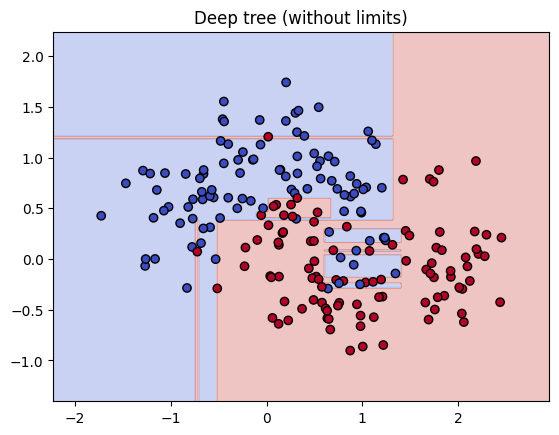

In [36]:
deep_tree = DecisionTreeClassifier(random_state=42)  # Bez limitu głębokości
deep_tree.fit(X, y)
plot_decision_boundary(deep_tree, X, y, "Deep tree (without limits)")

In [37]:
deep_tree.tree_.max_depth

12

In [38]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5),
                     np.linspace(y_min, y_max, 5))
xx, yy

(array([[-2.22625764, -0.93136903,  0.36351959,  1.65840821,  2.95329682],
        [-2.22625764, -0.93136903,  0.36351959,  1.65840821,  2.95329682],
        [-2.22625764, -0.93136903,  0.36351959,  1.65840821,  2.95329682],
        [-2.22625764, -0.93136903,  0.36351959,  1.65840821,  2.95329682],
        [-2.22625764, -0.93136903,  0.36351959,  1.65840821,  2.95329682]]),
 array([[-1.40337216, -1.40337216, -1.40337216, -1.40337216, -1.40337216],
        [-0.49239131, -0.49239131, -0.49239131, -0.49239131, -0.49239131],
        [ 0.41858955,  0.41858955,  0.41858955,  0.41858955,  0.41858955],
        [ 1.32957041,  1.32957041,  1.32957041,  1.32957041,  1.32957041],
        [ 2.24055126,  2.24055126,  2.24055126,  2.24055126,  2.24055126]]))

In [39]:
np.c_[xx.ravel(), yy.ravel()]

array([[-2.22625764, -1.40337216],
       [-0.93136903, -1.40337216],
       [ 0.36351959, -1.40337216],
       [ 1.65840821, -1.40337216],
       [ 2.95329682, -1.40337216],
       [-2.22625764, -0.49239131],
       [-0.93136903, -0.49239131],
       [ 0.36351959, -0.49239131],
       [ 1.65840821, -0.49239131],
       [ 2.95329682, -0.49239131],
       [-2.22625764,  0.41858955],
       [-0.93136903,  0.41858955],
       [ 0.36351959,  0.41858955],
       [ 1.65840821,  0.41858955],
       [ 2.95329682,  0.41858955],
       [-2.22625764,  1.32957041],
       [-0.93136903,  1.32957041],
       [ 0.36351959,  1.32957041],
       [ 1.65840821,  1.32957041],
       [ 2.95329682,  1.32957041],
       [-2.22625764,  2.24055126],
       [-0.93136903,  2.24055126],
       [ 0.36351959,  2.24055126],
       [ 1.65840821,  2.24055126],
       [ 2.95329682,  2.24055126]])

### GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

X, y = make_moons(n_samples=200, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

params = {
    'max_leaf_nodes': list(range(2, 100)),
    'max_depth': list(range(1, 7)),
    'min_samples_split': [2, 3, 4]
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [45]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, random_state=42)

In [46]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.84

#DecisionTreeRegressor + GridSearchCV

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = 3 * (X_quad.squeeze())**2 + 0.05 * np.random.randn(200)

X_train, X_test, y_train, y_test = train_test_split(X_quad, y_quad, random_state=42)

param_grid = {
    'max_depth': [1, 2, 3, 4, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

tree_reg = DecisionTreeRegressor(random_state=42)

grid_search = GridSearchCV(tree_reg, param_grid, cv=5,
                           scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best result (neg MSE):", grid_search.best_score_)

Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best result (neg MSE): -0.004118147098516193


In [21]:
best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Actual depth of the tree: {best_tree.tree_.max_depth}")

Test MSE: 0.0031
Actual depth of the tree: 10


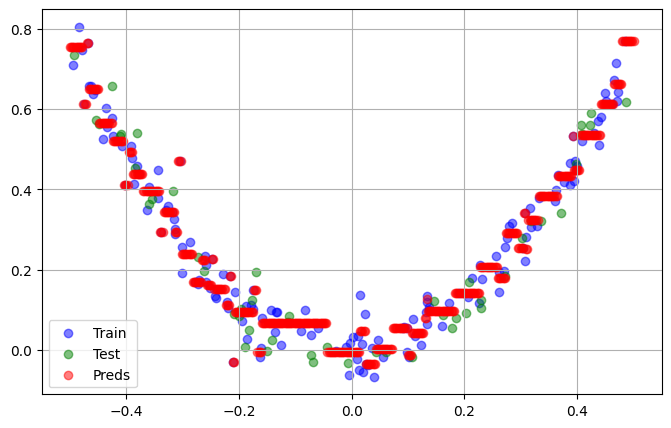

In [28]:
X_test_grid = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred_grid = best_tree.predict(X_test_grid)

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, c="b", label="Train", alpha=0.5)
plt.scatter(X_test, y_test, c="g", label="Test", alpha=0.5)
plt.scatter(X_test_grid, y_pred_grid, c="r", label="Preds", alpha=0.5)

plt.grid()
plt.legend()
plt.show()